## <center> Open Machine Learning Course


Haftalık Medium yazıları, ödevler, Kaggle yarışmalarıyla desteklenen makine öğrenmesi kursu geçen hafta başladı. Kursu düzenleyen ekibe baktığımda kitlesel açık kurslardan (MOOC) daha eğlenceli ve interaktif bir kurs olacağa benziyor. Başvuru linkinden Slack grubuna dahil olabilirsiniz.

Veri biliminde öngörülen 2018 trendlerini paylaştığım ilk yazımdan sonra makine öğrenmesi derslerinin haftalık ödevlerini Türkçe açıklamalı olarak çözmeye karar verdim.

Çünkü bu alanla ilgili standart ders kitapları kişiyi fazla teknik detaya boğduğundan ya ilk ünite bitmeden “bu iş bana göre değil bunu gugıldaki, feysbuktaki, tivitırdaki adamlar anca anlar” deyip aşağılık kompleksine giriyoruz ya da youtube vidyolarının arka arkası gelmeyen pasifliğinde oradan oraya savruluyoruz. Günün sonunda big data, machine learning, deep learning, artificial intelligence diyen ama basit bir KNN algoritmasını yapamayan meraklılar haline dönüşüyoruz.

Biz de amacımızdan sapmadan hemen konuya dönelim. İlk derste Python’ın Pandas kütüphanesindeki temel fonksiyonlar ile telekom verisi üzerinde müşteri kayıp analizi yapılıyor.

Ödevler konu anlatımına paralel olduğu için ilk dersi çevirmedim ama ders hakkında sorularınız olursa mutlaka yazın.

# <center> Assignment #1
## <center>  Açıklayıcı Veri Analizi


Adult verisini bilgisayarınıza indirmeden aşağıdaki archive.ics sitesinden çekebilirsiniz. 
    Sitede sütunlar olmadığı için header = None yapıyoruz ki ilk satırımız yukarı kaymasın, merak edenler o kısmı atıp deneyebilir.

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max.columns', 100)
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df.head()

HTTPError: HTTP Error 404: Not Found

Şimdi sütunları ekleyip tekrar bakıyoruz. Her şey yolunda gözüküyor.

In [2]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Veri setinde kaç erkek ve kadın vardır?** 

Veri tipi cinsiyet gibi kategori olan öznitelikleri value_counts() fonksiyonuyla kolayca sayabiliyoruz.

In [3]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

**2. Kadınların yaş ortalaması kaçtır?**

df.sex == ' Female' bize boolean cinsinden (True veya False) bir kadın indeksi oluşturuyor.
Başa gelen df o indekse göre arama yapıyor ve mean fonksiyonuyla istediğimizi kolayca buluyoruz.

In [5]:
round(df[df.sex == ' Female']['age'].mean(),3)

36.858

**3. Almanların veri setindeki oranı nedir?**

Yukarıdaki kadın indeksine benzer olarak bir Alman indeksi oluşturduk ve yine o indekse göre arama yaptık.
len() fonksiyonu bize seçtiğimiz data frame'in kaç satırdan oluştuğunu veriyor.

In [6]:
round(len(df[df['native-country'] == ' Germany'])/ len(df), 4)

0.0042

**4. Eğitim özniteliğine göre histogram çizin.**

x eksenine eğitim seviyelerini tekrar olmaksızın (unique) koyuyoruz. 
y ekseninde de bildiğimiz value_counts() fonksiyonuyla her eğitim seviyesinde kaç kişinin olduğunu buluyoruz.
rotation x eksenindeki yazılar iç içe geçmesin diye mutlaka yapılmalı.

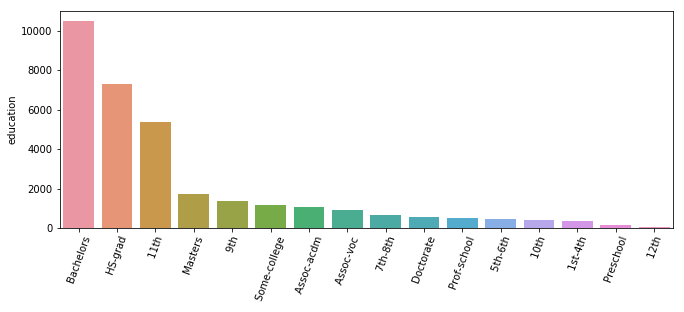

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 4
sns.barplot(x=df.education.unique(), y=df.education.value_counts())
plt.xticks(rotation=70)
plt.show()

**5. Yıllık 50 binden fazla ve az kazananların yaşlarının ortalama ve std. sapma değerleri nedir?**

Indeks fikri yukarıdakilerle aynı olduğu için tekrar yazma gereği duymuyorum, describe() fonksiyonu ortalama, standart sapma ve percentile değerlerini bize veriyor.

In [8]:
print(df[df.salary == ' <=50K'].age.describe())
print('')
print(df[df.salary == ' >50K'].age.describe())

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64


**6. Yıllık 50 binden fazla kazananlar en az lise mezunu mudur?**

Yıllık 50K'dan fazla kazanan insanların eğitim seviyelerini yine basit bir index ve unique() fonksiyonuyla buluyoruz ve hemen her eğitim seviyesinden insanın olduğunu görüyoruz.

In [9]:
df[df.salary == ' >50K'].education.unique()

array([' HS-grad', ' Masters', ' Bachelors', ' Some-college',
       ' Assoc-voc', ' Doctorate', ' Prof-school', ' Assoc-acdm',
       ' 7th-8th', ' 12th', ' 10th', ' 11th', ' 9th', ' 5th-6th',
       ' 1st-4th'], dtype=object)

**7. Irk ve cinsiyet özniteliklerini gruplandırarak bu grupların yaş istatiklerini bulunuz.
Ayrıca Amer-Indian-Eskimo ırkının en yaşlı üyesinin yaşını bulunuz.**

groupby() fonksiyonu tahmin edileceği gibi verimizi istediğimiz özniteliklerle göre gruplara ayırıyor, sonrasında basitçe describe() fonksiyonunu kullanıyoruz. 

In [10]:
print(df.groupby('race')['age'].describe())
print('')
print(df.groupby('sex')['age'].describe())
print('')
"Amer-Indian-Eskimoların en yaşlısı {0} yaşında. ".format(df[df.race == ' Amer-Indian-Eskimo']['age'].max())

                       count       mean        std   min   25%   50%   75%  \
race                                                                         
 Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  28.0  35.0  45.5   
 Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  28.0  36.0  45.0   
 Black                3124.0  37.767926  12.759290  17.0  28.0  36.0  46.0   
 Other                 271.0  33.457565  11.538865  17.0  25.0  31.0  41.0   
 White               27816.0  38.769881  13.782306  17.0  28.0  37.0  48.0   

                      max  
race                       
 Amer-Indian-Eskimo  82.0  
 Asian-Pac-Islander  90.0  
 Black               90.0  
 Other               77.0  
 White               90.0  

           count       mean        std   min   25%   50%   75%   max
sex                                                                 
 Female  10771.0  36.858230  14.013697  17.0  25.0  35.0  46.0  90.0
 Male    21790.0  39.433547  13.370630  17.0  29.

'Amer-Indian-Eskimoların en yaşlısı 82 yaşında. '

**8 Yıllık 50 binden fazlanan kişiler arasında evlilerin mi yoksa bekarların mı oranı daha fazla?
**

Bildiğimiz fonksiyonları kullandığımız cevapta başında married olanlar evli diğerleri bekar olarak sayılıyor ve evlilerin ezici üstünlüğünü görüyoruz.

In [11]:
df[df.salary == ' >50K']['marital-status'].value_counts()

 Married-civ-spouse       6692
 Never-married             491
 Divorced                  463
 Widowed                    85
 Separated                  66
 Married-spouse-absent      34
 Married-AF-spouse          10
Name: marital-status, dtype: int64

**9. a. Haftalık en çok çalışan kişi kaç saat çalışmış?
b. En çok çalışan grup kaç kişiden oluşuyor?
c. Bu grubun içinde yıllık 50 binden fazla kazananların oranı nedir?**

In [12]:
print("Haftalık en çok çalışan grup {0} saat çalışmış.".format(df['hours-per-week'].max()))
print('')
print("Bu grup {0} kişiden oluşuyor.".format(len(df[df['hours-per-week'] == df['hours-per-week'].max()])))
print('')
print('Grubun maaş dağılımı şöyle:')
print('')
print(df[df['hours-per-week'] == df['hours-per-week'].max()].salary.value_counts())
print('')
print("Bu grubun içinde yıllık 50K'dan fazla kazananların oranı {0:.4f}.".format(25/85))

Haftalık en çok çalışan grup 99 saat çalışmış.

Bu grup 85 kişiden oluşuyor.

Grubun maaş dağılımı şöyle:

 <=50K    60
 >50K     25
Name: salary, dtype: int64

Bu grubun içinde yıllık 50K'dan fazla kazananların oranı 0.2941.


**10. Her ülke için az ve çok (>50K veya <=50K) maaş kazan insanların haftalık ortalama çalışma sürelerini hesaplayınız.
**

Buraya kadar beni okuyan sevgili okuruma teşekkür ediyor aşağıdaki kodu şimdiye kadar anlattıklarımla anlayacağını ümit ediyorum.

In [13]:
print(df[df.salary == ' >50K'].groupby('native-country')['hours-per-week'].mean())
print('')
print(df[df.salary == ' <=50K'].groupby('native-country')['hours-per-week'].mean())

native-country
 ?                     45.547945
 Cambodia              40.000000
 Canada                45.641026
 China                 38.900000
 Columbia              50.000000
 Cuba                  42.440000
 Dominican-Republic    47.000000
 Ecuador               48.750000
 El-Salvador           45.000000
 England               44.533333
 France                50.750000
 Germany               44.977273
 Greece                50.625000
 Guatemala             36.666667
 Haiti                 42.750000
 Honduras              60.000000
 Hong                  45.000000
 Hungary               50.000000
 India                 46.475000
 Iran                  47.500000
 Ireland               48.000000
 Italy                 45.400000
 Jamaica               41.100000
 Japan                 47.958333
 Laos                  40.000000
 Mexico                46.575758
 Nicaragua             37.500000
 Peru                  40.000000
 Philippines           43.032787
 Poland                39.00

İlk ders Python’a veya başka bir programlama diline hakim olan insanlar için kolay gelebilir. Onlar için hızlı bir tekrar olmuştur umarım, derslerin zorluğu her hafta artacak aman rehavete kapılmayın. İlk defa programlamaya giriş yapanlar için de keyifli bir başlangıç olmuştur umarım.

Tekrara boğmadan elimden geldiğince basit yazmaya çalıştım ama açık olmayan kısımlar olabilir, bana yazarsanız gerekli eklemeleri/düzenlemeleri yaparım.

Haftaya ikinci derse kadar herkesin kodları kendi bilgisayarında denemesini tavsiye ederim. Emin olun bilgisayarınızda yapıp düzelteceğiniz 1 hata, buna benzer 20 yazı okuyup 15 video izlemekten çok daha faydalı olacaktır.

Her ne kadar ağır teori kitaplarıyla makine öğrenmesine başlamanızı tavsiye etmesem de bütün bu çalışmaları yaparken veri biliminin temelinde istatistik olduğunu unutmamak gerekiyor. Kolay konuların ve ödevlerin olduğu ilk üç hafta giriş düzeyinde bir istatistik kitabına başlamanızı tavsiye ederim.

Bitirmeden Josh Wills’in veri bilimcisi tanımını da sizinle paylaşayım.

## Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.